# Predicting Loan Default

### In this project, I am going to analyze and present my finding on Loan Default causes. 

## Data Description:

    1. first_pmt_date:     Date of first monthly mortgage payment. YYYYMM
    2. age           :     Time (in months) from origination to last recorded payment.  
                           If the mortgage has prepaid or defaulted, it is the time (in months) to termination.
    3. status        :     Alive – The mortgage is still outstanding and is currently receiving monthly payment. 
                           Prepay – Homeowner has paid the full balance of principal on the mortgage. 
                           Mortgage is terminated.
                           Default – Homeowner has failed to pay off the mortgage and is in default. 
                           Mortgage is terminated.
    4. first_time_ho_flag: First-time homeowner flag [Y, N]
    5. msa_code          : Code relating to the metropolitan statistical area
    6. mi_pct            : Mortgage insurance premium
    7. credit_score      : Credit score of the primary borrower.
    8. num_units         : Number of residential units in the building.
    9. occupancy_status  : O – Owner-occupied, S – Second Home, I – Investor Property.
    10.orig_cltv         : Combined loan to value of the mortgage at origination.
                           Loan to value represents the total amount of debt divided by the value of the home.
    11. orig_dti         : Origination debt-to-income.
                           Debt to income is the total amount of monthly payments associated with the mortgage 
                           divided by the total monthly income of the borrower.
    12. orig_upb         : Original unpaid balance. The total amount of principal outstanding on the mortgage.
    13. orig_ir          : Interest rate on the mortgage.
    14. prop_type        : Property type: SF – Single family, CO – Condo, PU – PUD, MH – Manufactured, 
                           CP – Co-op, 99 - Unavailable
    15. state            : State abbreviation
    16. zip              : First 3 digits of the zip code
    17. loan_seq_num     : Mortgage ID
    18. loan_purpose     : Purpose of loan: P – Purchase loan, C – Cash out refinance, 
                           N – Non-cash out refinance
    19. num_borrowers    : Number of distinct borrowers
 

In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_context('talk')

### Loading the data

In [2]:
data = pd.read_csv('data.csv')
data.shape

(20000, 22)

In [3]:
data.head()

,Unnamed: 0,first_pmt_date,year,month,age,status,first_time_ho_flag,msa_code,mi_pct,credit_score,...,orig_cltv,orig_dti,orig_upb,orig_ir,prop_type,state,zip,loan_seq_num,loan_purpose,num_borrowers
0,0,2006-01-01,2006,1,93.0,Prepay,N,45460.0,000,635.0,...,76.0,55,57000,6.125,SF,IN,47800.0,F105Q4357152,N,2.0
1,1,2007-07-01,2007,7,117.0,Alive,N,NaN,12,624.0,...,85.0,52,202000,6.250,SF,WI,53100.0,F107Q2066413,C,2.0
2,2,1999-10-01,1999,10,28.0,Prepay,Y,12420.0,20,680.0,...,75.0,56,237000,7.750,PU,TX,78700.0,F199Q3132223,P,1.0
3,3,2007-05-01,2007,5,119.0,Alive,N,39900.0,000,724.0,...,49.0,39,110000,5.625,SF,NV,89500.0,F107Q1290916,C,2.0
4,4,2015-04-01,2015,4,24.0,Alive,NaN,40140.0,000,794.0,...,49.0,40,150000,3.750,SF,CA,92500.0,F115Q1229673,N,2.0


In [4]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [5]:
data.shape

(20000, 21)

In [6]:
data.head()

,first_pmt_date,year,month,age,status,first_time_ho_flag,msa_code,mi_pct,credit_score,num_units,...,orig_cltv,orig_dti,orig_upb,orig_ir,prop_type,state,zip,loan_seq_num,loan_purpose,num_borrowers
0,2006-01-01,2006,1,93.0,Prepay,N,45460.0,000,635.0,1,...,76.0,55,57000,6.125,SF,IN,47800.0,F105Q4357152,N,2.0
1,2007-07-01,2007,7,117.0,Alive,N,NaN,12,624.0,1,...,85.0,52,202000,6.250,SF,WI,53100.0,F107Q2066413,C,2.0
2,1999-10-01,1999,10,28.0,Prepay,Y,12420.0,20,680.0,1,...,75.0,56,237000,7.750,PU,TX,78700.0,F199Q3132223,P,1.0
3,2007-05-01,2007,5,119.0,Alive,N,39900.0,000,724.0,1,...,49.0,39,110000,5.625,SF,NV,89500.0,F107Q1290916,C,2.0
4,2015-04-01,2015,4,24.0,Alive,NaN,40140.0,000,794.0,1,...,49.0,40,150000,3.750,SF,CA,92500.0,F115Q1229673,N,2.0


### Exploratory Data Analysis (EDA)

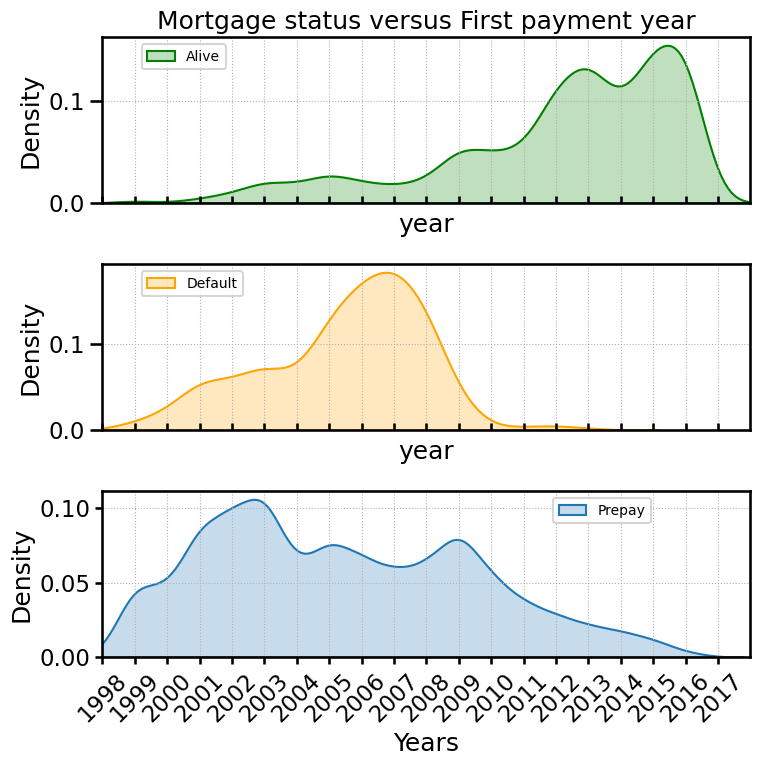

In [7]:
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(3,1, figsize=(8, 8))

ax[0].grid(linestyle=':',linewidth='0.80')
ax[1].grid(linestyle=':',linewidth='0.80')
ax[2].grid(linestyle=':',linewidth='0.80')

sns.kdeplot(ax = ax[0], x= data.loc[data['status'] == 'Alive', 'year'],   label = 'Alive', fill=True, color ='green')
sns.kdeplot(ax = ax[1], x= data.loc[data['status'] == 'Default', 'year'],   label = 'Default', fill=True, color ='orange')
sns.kdeplot(ax = ax[2], x= data.loc[data['status'] == 'Prepay', 'year'],   label = 'Prepay', fill=True)


ax[0].set_xlim(1998, 2018)
ax[0].set_xticks(list(np.arange(1998,2018,1)))
ax[0].tick_params(axis ='x', direction ='in', length = 5, color ='black')
ax[0].axes.xaxis.set_ticklabels([])

ax[1].set_xlim(1998, 2018)
ax[1].set_xticks(list(np.arange(1998,2018,1)))
ax[1].tick_params(axis ='x', direction ='in', length = 5, color ='black')
ax[1].axes.xaxis.set_ticklabels([])

ax[2].set_xlim(1998, 2018)
ax[2].set_xticks(list(np.arange(1998,2018,1)))
ax[2].tick_params(axis ='both', direction ='out', length = 5, color ='black')


ax[0].set_title('Mortgage status versus First payment year')
ax[2].set_xlabel('Years')

plt.subplots_adjust(wspace=0, hspace=0)
plt.xticks(rotation = 45)

ax[0].legend(loc='upper left', ncol=1, bbox_to_anchor=(0.05, 0.5, 0.5, 0.5),labelspacing = 0.62, prop={ 'size': 10})
ax[1].legend(loc='upper left', ncol=1, bbox_to_anchor=(0.05, 0.5, 0.5, 0.5),labelspacing = 0.62, prop={ 'size': 10})
ax[2].legend(loc='upper left', ncol=1, bbox_to_anchor=(0.685, 0.5, 0.5, 0.5),labelspacing = 0.62, prop={ 'size': 10})


plt.tight_layout()
plt.show()

# Comments
1. The mortgage status was predominately of prepay type till 2011. <br>
   i.e. Homeowner has paid the full balance of principal on the mortgage. Mortgage is terminated. <br> <br>
   
2. There are small count of Default mortgage status around 2000 - 2011. <br> 
   **The default type is always less than prepay or alive type.** <br>
   Also, these default occur around the Dotcom market crash ($\sim$ 2002) and Financial crisis ($\sim$ 2008). Mortgage is terminated <br>
   
   
3. The mortgage status started changing to Alive type around 2009-2011 and is now predominant status type. <br>
   i.e. The mortgage is still outstanding and is currently receiving monthly payments. <br> 
   


In [8]:
df = data.groupby(['status','age'])['age'].agg(['count']).reset_index()
df.head(10)

,status,age,count
0,Alive,5.0,123
1,Alive,6.0,124
2,Alive,7.0,118
3,Alive,8.0,92
4,Alive,9.0,104
5,Alive,10.0,78
6,Alive,11.0,78
7,Alive,12.0,60
8,Alive,13.0,60
9,Alive,14.0,91


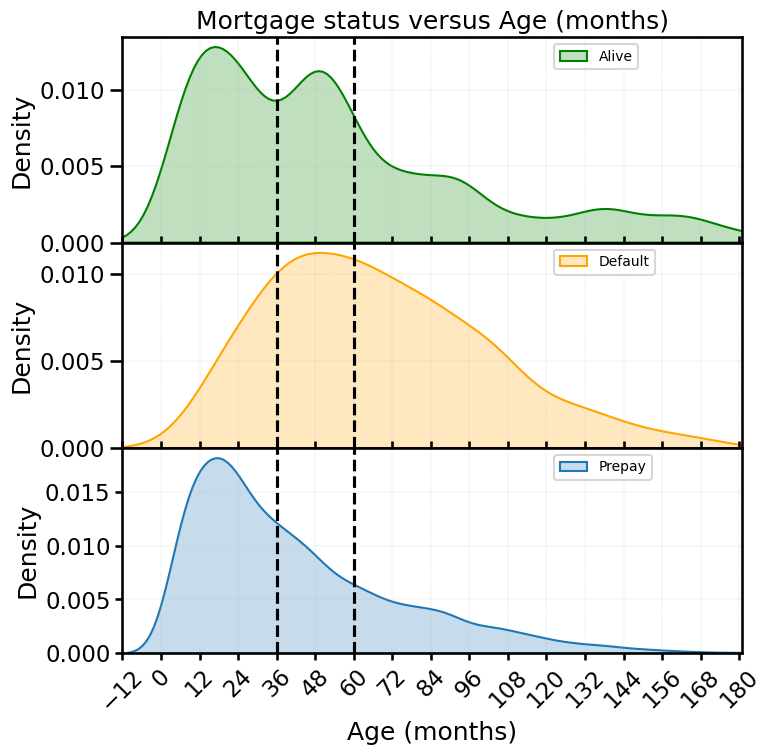

In [9]:
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(3,1, figsize= (8,8))

ax[0].grid(linestyle=':',linewidth='0.30')
ax[1].grid(linestyle=':',linewidth='0.30')
ax[2].grid(linestyle=':',linewidth='0.30')



sns.kdeplot(ax = ax[0], x= data.loc[data['status'] == 'Alive', 'age'],   label = 'Alive', fill=True, color ='green')
sns.kdeplot(ax = ax[1], x= data.loc[data['status'] == 'Default', 'age'],   label = 'Default', fill=True, color ='orange')
sns.kdeplot(ax = ax[2], x= data.loc[data['status'] == 'Prepay', 'age'],   label = 'Prepay', fill=True)

ax[0].axvline(x = 60, ymin =0, ymax =1, color ='black', linestyle ='--')
ax[1].axvline(x = 60, ymin =0, ymax =1, color ='black', linestyle ='--')
ax[2].axvline(x = 60, ymin =0, ymax =1, color ='black', linestyle ='--')

ax[0].axvline(x = 36, ymin =0, ymax =1, color ='black', linestyle ='--')
ax[1].axvline(x = 36, ymin =0, ymax =1, color ='black', linestyle ='--')
ax[2].axvline(x = 36, ymin =0, ymax =1, color ='black', linestyle ='--')

ax[0].set_xlim(0, 181)
ax[0].set_xticks(list(np.arange(-12,181,12)))
ax[0].tick_params(axis ='x', direction ='in', length = 5, color ='black')
ax[0].axes.xaxis.set_ticklabels([])

ax[1].set_xlim(0, 181)
ax[1].set_xticks(list(np.arange(-12,181,12)))
ax[1].tick_params(axis ='x', direction ='in', length = 5, color ='black')
ax[1].axes.xaxis.set_ticklabels([])

ax[2].set_xlim(-1, 181)
ax[2].set_xticks(list(np.arange(-12,181,12)))
ax[2].tick_params(axis ='both', direction ='out', length = 5, color ='black')


ax[0].legend(loc='upper left', ncol=1, bbox_to_anchor=(0.685, 0.5, 0.5, 0.5),labelspacing = 0.62, prop={ 'size': 10})
ax[1].legend(loc='upper left', ncol=1, bbox_to_anchor=(0.685, 0.5, 0.5, 0.5),labelspacing = 0.62, prop={ 'size': 10})
ax[2].legend(loc='upper left', ncol=1, bbox_to_anchor=(0.685, 0.5, 0.5, 0.5),labelspacing = 0.62, prop={ 'size': 10})

ax[0].set_title('Mortgage status versus Age (months)')
ax[2].set_xlabel('Age (months)')




plt.subplots_adjust(wspace=0, hspace=0)
plt.xticks(rotation = 45)



plt.show()

**The first 3 - 5 years are most volatile period. After 5 years (60 months) all three catgories (Alive, Default and Prepay) decay monotonusly** 

**What are the percentage of Prepay, Default and Alive ?**

In [10]:
df = data[['status']]

p1 = len(df[df['status']=='Prepay'])/len(df)
p2 = len(df[df['status']=='Default'])/len(df)
p3 = len(df[df['status']=='Alive'])/len(df)

print("Total probability: \n Prepay(p1)  = %10.2f \n Default(p2) = %10.2f \n Alive(p3)   = %10.2f"%(p1,p2,p3))

Total probability: 
 Prepay(p1)  =       0.68 
 Default(p2) =       0.03 
 Alive(p3)   =       0.29


**The loan default ratio is low while most of the home owners have prepaid their loan.**

In [11]:
df_five = data[data['age']>=60]

p1 = len(df_five[df_five['status']=='Prepay'])/len(df_five)
p2 = len(df_five[df_five['status']=='Default'])/len(df_five)
p3 = len(df_five[df_five['status']=='Alive'])/len(df_five)

print("Probability after 5 years: \n Prepay(p1)  = %10.2f \n Default(p2) = %10.2f \n Alive(p3)   = %10.2f"%(p1,p2,p3))

Probability after 5 years: 
 Prepay(p1)  =       0.60 
 Default(p2) =       0.05 
 Alive(p3)   =       0.35


**For home owners with more than 5 years there is slight increase in alive and default status**

In [12]:
df_less_five = data[data['age']<60]

p1 = len(df_less_five[df_less_five['status']=='Prepay'])/len(df_less_five)
p2 = len(df_less_five[df_less_five['status']=='Default'])/len(df_less_five)
p3 = len(df_less_five[df_less_five['status']=='Alive'])/len(df_less_five)

print("Probability before 5 years: \n Prepay(p1)  = %10.2f \n Default(p2) = %10.2f \n Alive(p3)   = %10.2f"%(p1,p2,p3))

Probability before 5 years: 
 Prepay(p1)  =       0.71 
 Default(p2) =       0.02 
 Alive(p3)   =       0.27


**Prepay is more likely during first 5 years**

In [13]:
data.insert(loc = 4, column ='age_year', value = (data['age']/12).to_numpy()) # extracting month into age_year

In [14]:
data.isna().sum()

first_pmt_date           0
year                     0
month                    0
age                      0
age_year                 0
status                   0
first_time_ho_flag    6585
msa_code              2904
mi_pct                   0
credit_score            29
num_units                0
occupancy_status         0
orig_cltv                1
orig_dti                34
orig_upb                 0
orig_ir                  0
prop_type                0
state                    0
zip                      1
loan_seq_num             0
loan_purpose             0
num_borrowers            7
dtype: int64

In [15]:
data = data.drop(['msa_code'], axis = 1)

In [16]:
data.dtypes

first_pmt_date         object
year                    int64
month                   int64
age                   float64
age_year              float64
status                 object
first_time_ho_flag     object
mi_pct                 object
credit_score          float64
num_units               int64
occupancy_status       object
orig_cltv             float64
orig_dti               object
orig_upb                int64
orig_ir               float64
prop_type              object
state                  object
zip                   float64
loan_seq_num           object
loan_purpose           object
num_borrowers         float64
dtype: object

In [17]:
data.dtypes[data.dtypes== object]

first_pmt_date        object
status                object
first_time_ho_flag    object
mi_pct                object
occupancy_status      object
orig_dti              object
prop_type             object
state                 object
loan_seq_num          object
loan_purpose          object
dtype: object

In [18]:
from datetime import datetime 
data['first_pmt_date'] = pd.to_datetime(data['first_pmt_date'], format='%Y-%m-%d' )

### Data imputation

In [19]:
data['first_time_ho_flag'] = data['first_time_ho_flag'].replace(['Y','N', np.nan], ['Y','N','NA'])

In [20]:
data.head()

,first_pmt_date,year,month,age,age_year,status,first_time_ho_flag,mi_pct,credit_score,num_units,...,orig_cltv,orig_dti,orig_upb,orig_ir,prop_type,state,zip,loan_seq_num,loan_purpose,num_borrowers
0,2006-01-01,2006,1,93.0,7.750000,Prepay,N,000,635.0,1,...,76.0,55,57000,6.125,SF,IN,47800.0,F105Q4357152,N,2.0
1,2007-07-01,2007,7,117.0,9.750000,Alive,N,12,624.0,1,...,85.0,52,202000,6.250,SF,WI,53100.0,F107Q2066413,C,2.0
2,1999-10-01,1999,10,28.0,2.333333,Prepay,Y,20,680.0,1,...,75.0,56,237000,7.750,PU,TX,78700.0,F199Q3132223,P,1.0
3,2007-05-01,2007,5,119.0,9.916667,Alive,N,000,724.0,1,...,49.0,39,110000,5.625,SF,NV,89500.0,F107Q1290916,C,2.0
4,2015-04-01,2015,4,24.0,2.000000,Alive,NA,000,794.0,1,...,49.0,40,150000,3.750,SF,CA,92500.0,F115Q1229673,N,2.0


In [21]:
data.fillna({'credit_score':data['credit_score'].median()}, inplace = True)
data.fillna({'num_borrowers':data['num_borrowers'].median()}, inplace = True)

data.fillna({'orig_cltv':data['orig_cltv'].median()}, inplace = True)


In [22]:
data.isna().sum()

first_pmt_date         0
year                   0
month                  0
age                    0
age_year               0
status                 0
first_time_ho_flag     0
mi_pct                 0
credit_score           0
num_units              0
occupancy_status       0
orig_cltv              0
orig_dti              34
orig_upb               0
orig_ir                0
prop_type              0
state                  0
zip                    1
loan_seq_num           0
loan_purpose           0
num_borrowers          0
dtype: int64

In [23]:
data = data.drop(['zip','state','first_pmt_date','loan_seq_num'], axis = 1)

In [24]:
data.columns

Index(['year', 'month', 'age', 'age_year', 'status', 'first_time_ho_flag',
       'mi_pct', 'credit_score', 'num_units', 'occupancy_status', 'orig_cltv',
       'orig_dti', 'orig_upb', 'orig_ir', 'prop_type', 'loan_purpose',
       'num_borrowers'],
      dtype='object')

In [25]:
empty = list(data.orig_dti.to_numpy())
replace = []

for idx, val in enumerate(empty):
    if val !='   ':
        replace.append(float(val))
    else:
        replace.append(float('nan'))
    
data = data.drop(columns= ['orig_dti'])
data.insert(loc = 11, column ='orig_dti', value = replace)

data.fillna({'orig_dti':data['orig_dti'].median()}, inplace = True)

In [26]:
empty = list(data.mi_pct.to_numpy())
replace = []

for idx, val in enumerate(empty):
    if len(val.split()) != 0:
        replace.append(float(val))
    else:
        replace.append(float('nan'))

data = data.drop(columns= ['mi_pct'])
data.insert(loc = 7, column ='mi_pct', value = replace)

data.fillna({'mi_pct':data['mi_pct'].median()}, inplace = True)



In [27]:
data.orig_cltv  = pd.to_numeric(data.orig_cltv)
data.orig_upb  = pd.to_numeric(data.orig_upb)
data.orig_ir  = pd.to_numeric(data.orig_ir)


In [28]:
data.columns

Index(['year', 'month', 'age', 'age_year', 'status', 'first_time_ho_flag',
       'credit_score', 'mi_pct', 'num_units', 'occupancy_status', 'orig_cltv',
       'orig_dti', 'orig_upb', 'orig_ir', 'prop_type', 'loan_purpose',
       'num_borrowers'],
      dtype='object')

In [29]:
status_val = list(data.status.values)
status_conv = []

for ii in range(0, len(status_val)):
    if status_val[ii] == 'Prepay':
        status_conv.append(0)
    if status_val[ii] == 'Default':
        status_conv.append(0)
    if status_val[ii] == 'Alive':
        status_conv.append(1)
    

In [30]:
data = data.drop(['status'], axis = 1)

In [31]:
data.insert(loc = 1, column ='status', value = status_conv) 

In [32]:
data.head()

,year,status,month,age,age_year,first_time_ho_flag,credit_score,mi_pct,num_units,occupancy_status,orig_cltv,orig_dti,orig_upb,orig_ir,prop_type,loan_purpose,num_borrowers
0,2006,0,1,93.0,7.750000,N,635.0,0.0,1,O,76.0,55.0,57000,6.125,SF,N,2.0
1,2007,1,7,117.0,9.750000,N,624.0,12.0,1,O,85.0,52.0,202000,6.250,SF,C,2.0
2,1999,0,10,28.0,2.333333,Y,680.0,20.0,1,O,75.0,56.0,237000,7.750,PU,P,1.0
3,2007,1,5,119.0,9.916667,N,724.0,0.0,1,O,49.0,39.0,110000,5.625,SF,C,2.0
4,2015,1,4,24.0,2.000000,NA,794.0,0.0,1,O,49.0,40.0,150000,3.750,SF,N,2.0


In [33]:
categorical_cols = []
continuous_cols = []
for x in data.columns:
    if data[x].nunique() < 10 and x != 'status':
        categorical_cols.append(x)   
    elif x!='status':
        continuous_cols.append(x)


In [34]:
data.shape

(20000, 17)

In [35]:
categorical_cols

['first_time_ho_flag',
 'num_units',
 'occupancy_status',
 'prop_type',
 'loan_purpose',
 'num_borrowers']

In [36]:
continuous_cols

['year',
 'month',
 'age',
 'age_year',
 'credit_score',
 'mi_pct',
 'orig_cltv',
 'orig_dti',
 'orig_upb',
 'orig_ir']

In [37]:
data = pd.get_dummies(data, columns=categorical_cols)

In [38]:
data.head()

,year,status,month,age,age_year,credit_score,mi_pct,orig_cltv,orig_dti,orig_upb,...,prop_type_CP,prop_type_LH,prop_type_MH,prop_type_PU,prop_type_SF,loan_purpose_C,loan_purpose_N,loan_purpose_P,num_borrowers_1.0,num_borrowers_2.0
0,2006,0,1,93.0,7.750000,635.0,0.0,76.0,55.0,57000,...,0,0,0,0,1,0,1,0,0,1
1,2007,1,7,117.0,9.750000,624.0,12.0,85.0,52.0,202000,...,0,0,0,0,1,1,0,0,0,1
2,1999,0,10,28.0,2.333333,680.0,20.0,75.0,56.0,237000,...,0,0,0,1,0,0,0,1,1,0
3,2007,1,5,119.0,9.916667,724.0,0.0,49.0,39.0,110000,...,0,0,0,0,1,1,0,0,0,1
4,2015,1,4,24.0,2.000000,794.0,0.0,49.0,40.0,150000,...,0,0,0,0,1,0,1,0,0,1


In [39]:
# Find correlations with the target and sort
correlations = data.corr()['status'].sort_values()
abs(correlations).sort_values(ascending=False).head(100)

status                   1.000000
year                     0.610910
orig_ir                  0.562239
first_time_ho_flag_N     0.283274
first_time_ho_flag_NA    0.263885
age                      0.154507
age_year                 0.154507
credit_score             0.140363
prop_type_PU             0.069476
prop_type_SF             0.062628
num_borrowers_2.0        0.060297
num_borrowers_1.0        0.060297
orig_upb                 0.059616
first_time_ho_flag_Y     0.053279
occupancy_status_I       0.053224
occupancy_status_O       0.040494
orig_cltv                0.032580
orig_dti                 0.029643
num_units_1              0.014870
loan_purpose_N           0.014672
month                    0.013042
num_units_3              0.012342
prop_type_CP             0.011836
loan_purpose_P           0.011671
mi_pct                   0.011657
prop_type_               0.010999
num_units_2              0.008793
num_units_4              0.006655
prop_type_MH             0.005235
prop_type_LH  

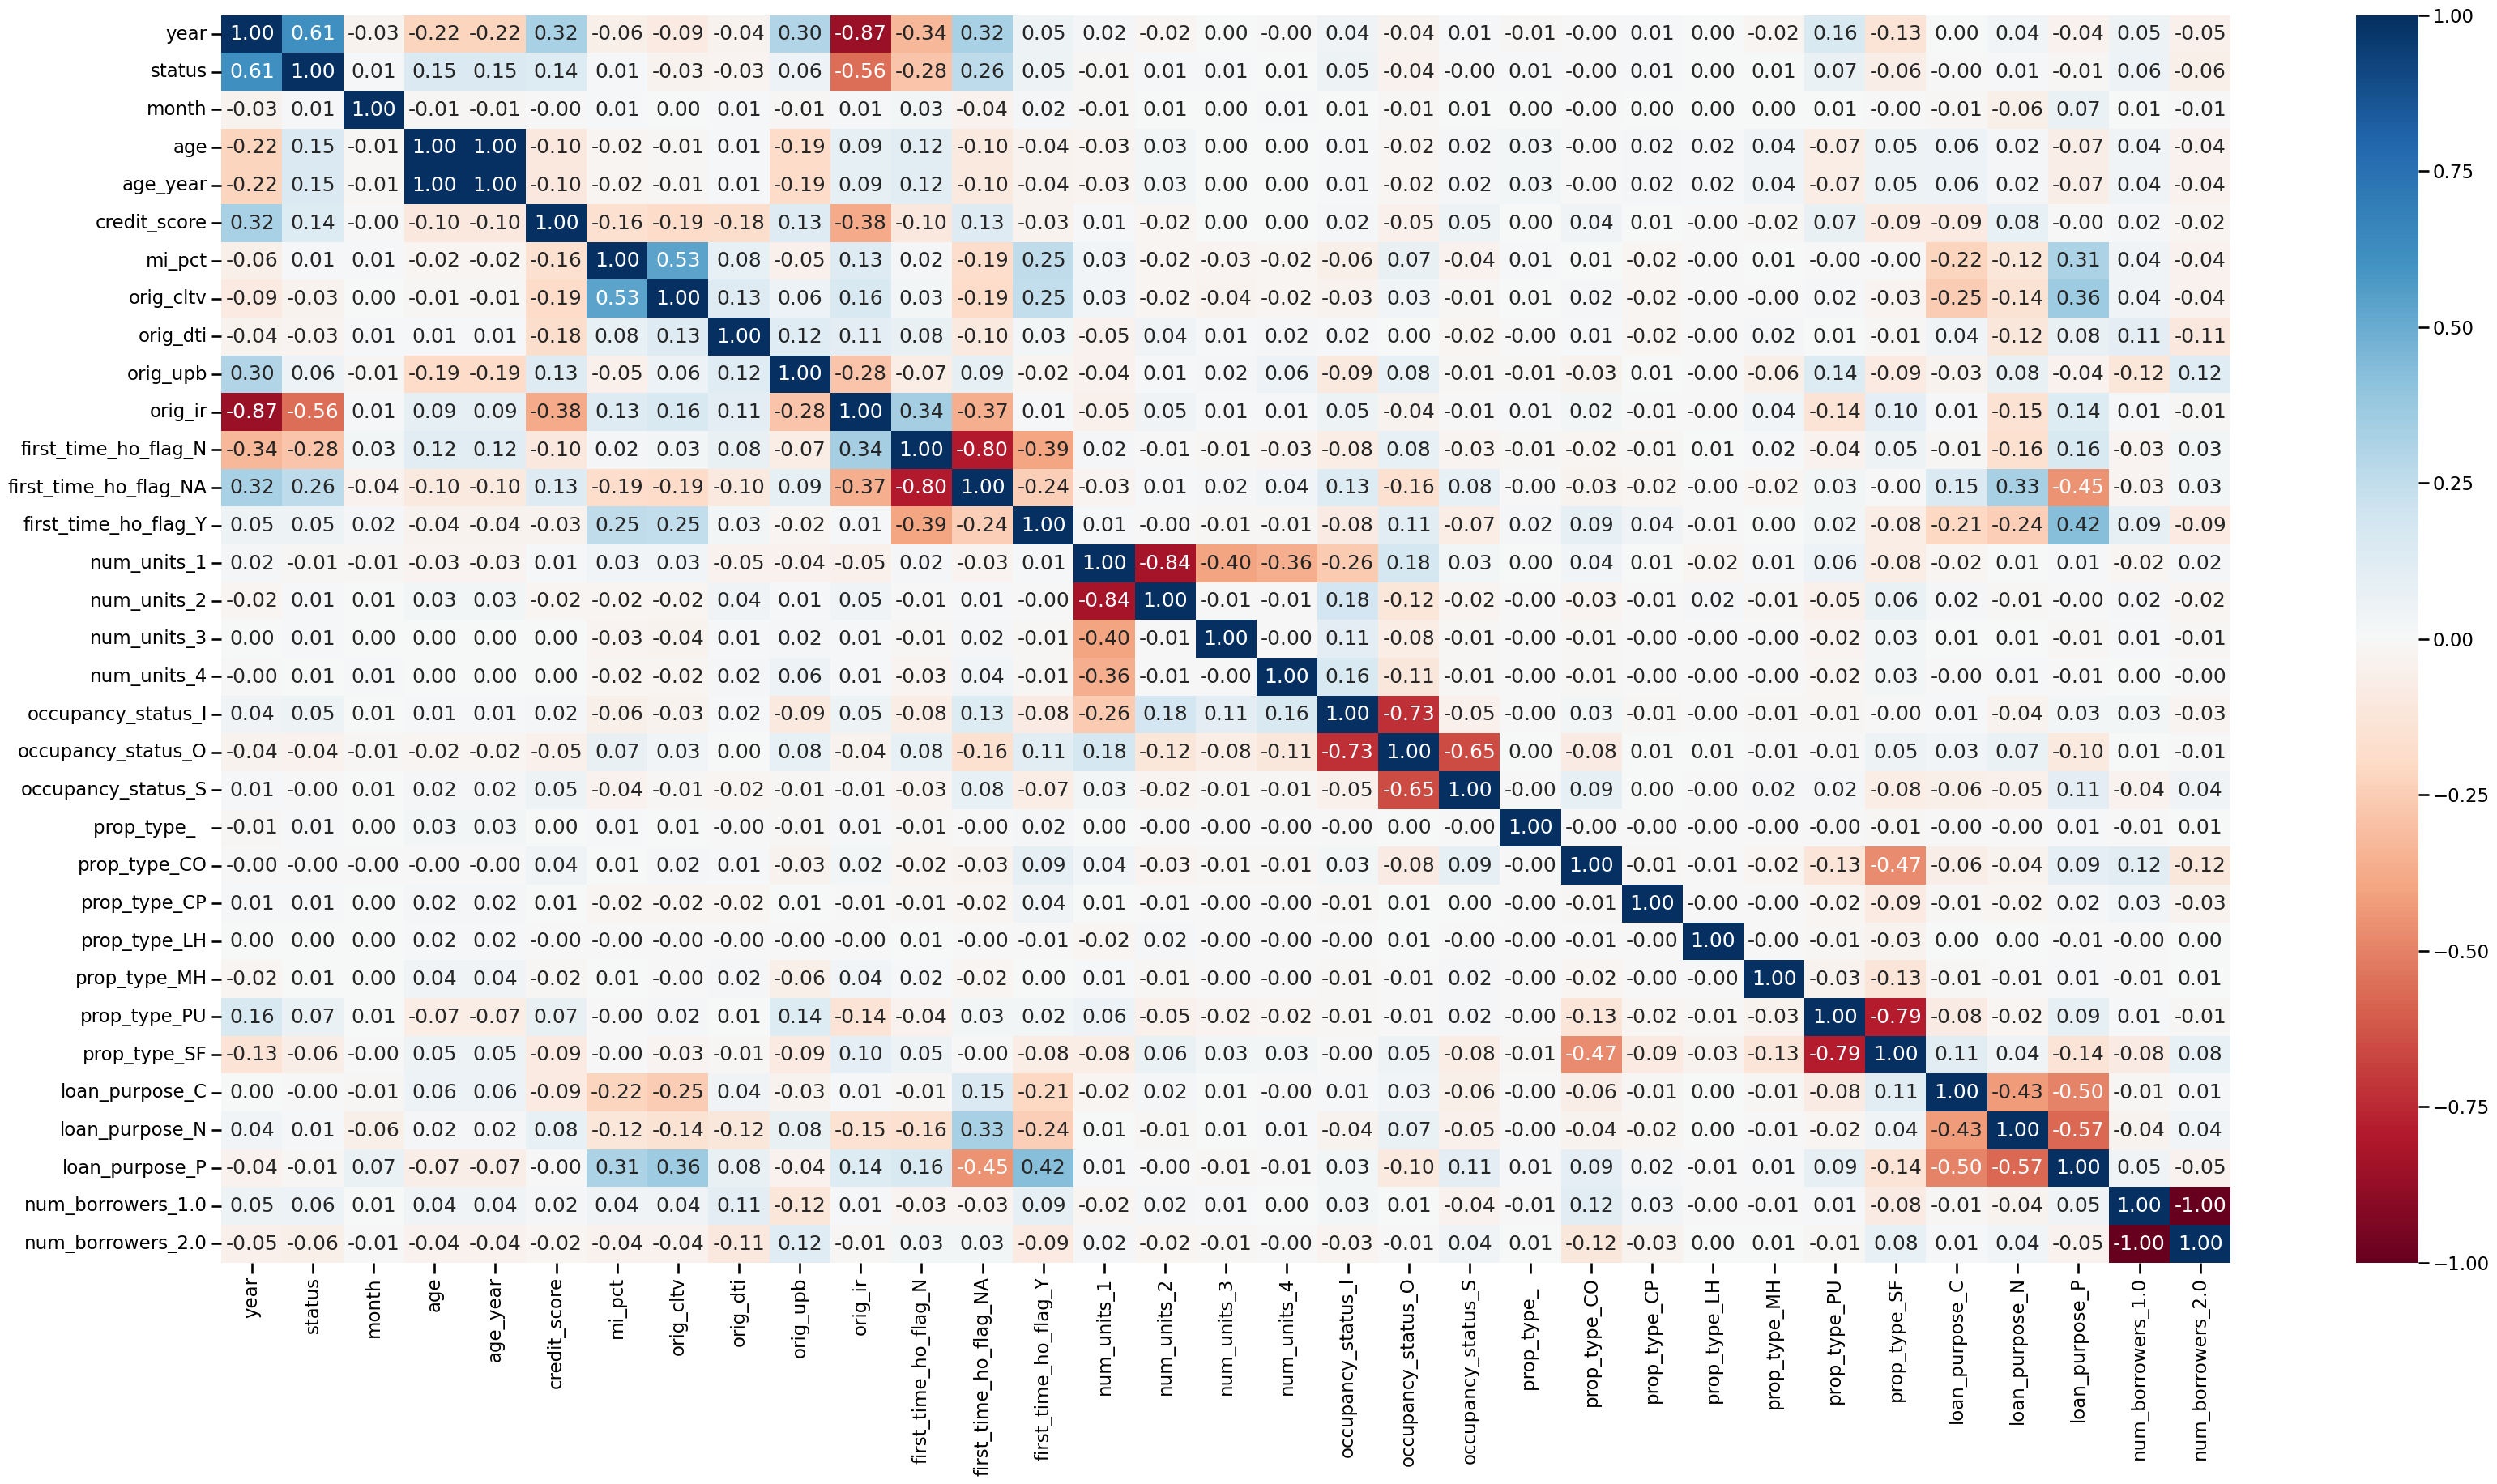

In [40]:
fig, ax = plt.subplots(figsize=(40,20) )
sns.heatmap(data.corr(), cmap ='RdBu', annot= True, fmt ='0.2f')
plt.show()

**Status (Prepay, Active or Default) is highly correlated with "year" and "original interest rate" and "First time home owner No" Features **

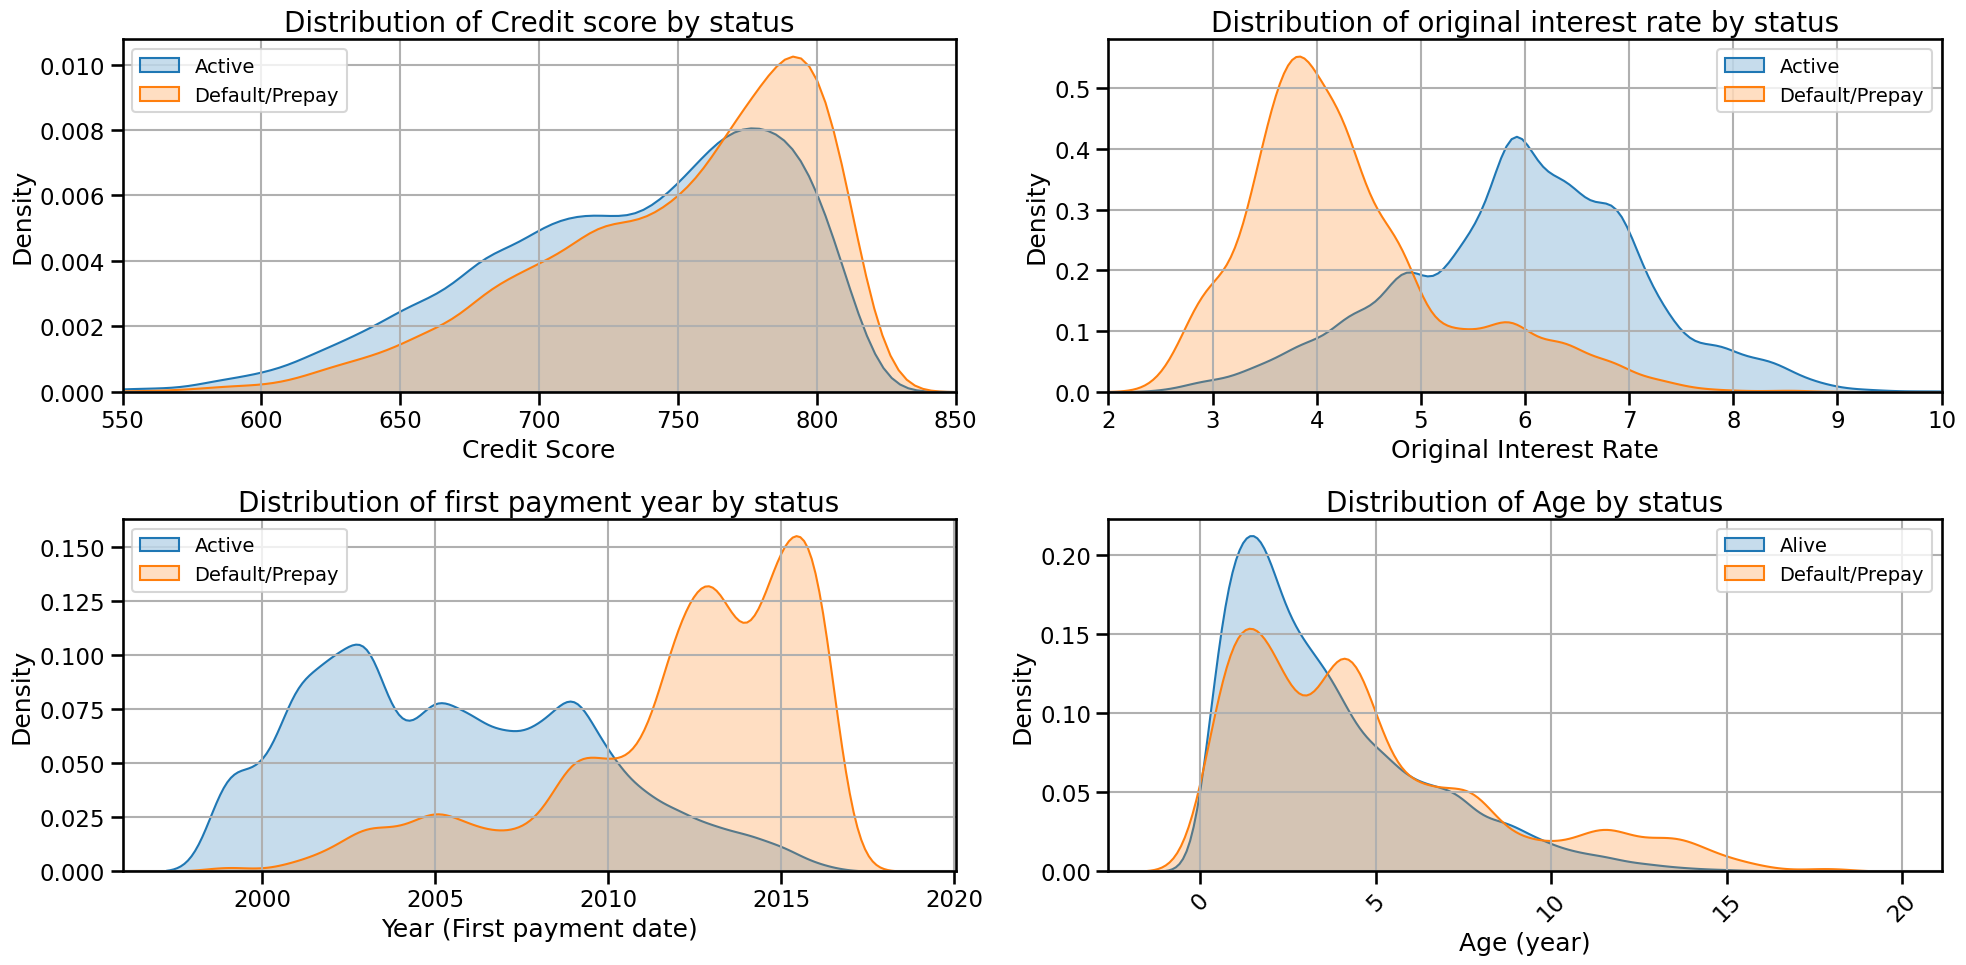

In [41]:
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(2,2, figsize = (20,10))

#-------------------------------------- Credit Score -----------------------------------------------

sns.kdeplot(ax = ax[0][0], x = data.loc[data['status'] == 0, 'credit_score'],   label = 'Active', fill=True)
sns.kdeplot(ax = ax[0][0], x = data.loc[data['status'] == 1, 'credit_score'],   label = 'Default/Prepay', fill=True)

ax[0][0].set_xlabel('Credit Score'); 
ax[0][0].set_ylabel('Density'); 
ax[0][0].set_title('Distribution of Credit score by status', size = 20);
ax[0][0].legend(loc='upper left', prop ={'size' :14})
ax[0][0].set_xlim(550, 850)
ax[0][0].grid()


# #-------------------------------------- Original interest -----------------------------------------------

sns.kdeplot(ax = ax[0][1], x = data.loc[data['status'] == 0, 'orig_ir'],   label = 'Active', fill=True)
sns.kdeplot(ax = ax[0][1], x = data.loc[data['status'] == 1, 'orig_ir'],   label = 'Default/Prepay', fill=True)

ax[0][1].set_xlabel('Original Interest Rate'); 
ax[0][1].set_ylabel('Density'); 
ax[0][1].set_title('Distribution of original interest rate by status', size = 20);
ax[0][1].legend(loc='upper right', prop ={'size' :14})
ax[0][1].set_xlim(2, 10)
ax[0][1].grid()


# #-------------------------------------- year -----------------------------------------------

sns.kdeplot(ax = ax[1][0], x = data.loc[data['status'] == 0, 'year'],   label = 'Active', fill=True)
sns.kdeplot(ax = ax[1][0], x = data.loc[data['status'] == 1, 'year'],   label = 'Default/Prepay', fill=True)

ax[1][0].set_xlabel('Year (First payment date)'); 
ax[1][0].set_ylabel('Density'); 
ax[1][0].set_title('Distribution of first payment year by status', size = 20);
ax[1][0].legend(loc='upper left', prop ={'size' :14})
ax[1][0].grid()



# #-------------------------------------- age -----------------------------------------------

sns.kdeplot(ax = ax[1][1], x = data.loc[data['status'] == 0, 'age_year'],   label = 'Alive', fill=True)
sns.kdeplot(ax = ax[1][1], x = data.loc[data['status'] == 1, 'age_year'],   label = 'Default/Prepay', fill=True)

ax[1][1].set_xlabel('Age (year)'); 
ax[1][1].set_ylabel('Density'); 
ax[1][1].set_title('Distribution of Age by status', size = 20);
ax[1][1].legend(loc='upper right', prop ={'size' :14})
ax[1][1].grid()





plt.subplots_adjust(wspace=0.25, hspace=0.45)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()




**Credit Score, Original interest rate, Year(first payment date) and Age (year)** all show significant difference for status : Prepay, Active and Default.

### Standardization 

In [42]:
continuous_cols

['year',
 'month',
 'age',
 'age_year',
 'credit_score',
 'mi_pct',
 'orig_cltv',
 'orig_dti',
 'orig_upb',
 'orig_ir']

In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

for x in continuous_cols:
    value = [str(x)]
    data[x] = sc.fit_transform(data[value])
    

In [44]:
data.head()

,year,status,month,age,age_year,credit_score,mi_pct,orig_cltv,orig_dti,orig_upb,...,prop_type_CP,prop_type_LH,prop_type_MH,prop_type_PU,prop_type_SF,loan_purpose_C,loan_purpose_N,loan_purpose_P,num_borrowers_1.0,num_borrowers_2.0
0,-0.280080,0,-1.677047,1.234881,1.234881,-1.885745,-0.463904,0.197497,1.885594,-1.243060,...,0,0,0,0,1,0,1,0,0,1
1,-0.078981,1,0.116954,1.878974,1.878974,-2.088070,0.715937,0.725656,1.622321,0.140295,...,0,0,0,0,1,1,0,0,0,1
2,-1.687767,0,1.013954,-0.509536,-0.509536,-1.058052,1.502498,0.138812,1.973351,0.474208,...,0,0,0,1,0,0,0,1,1,0
3,-0.078981,1,-0.481046,1.932648,1.932648,-0.248752,-0.463904,-1.386983,0.481473,-0.737420,...,0,0,0,0,1,1,0,0,0,1
4,1.529804,1,-0.780046,-0.616885,-0.616885,1.038770,-0.463904,-1.386983,0.569231,-0.355805,...,0,0,0,0,1,0,1,0,0,1


In [45]:
X = data.drop(['status'], axis = 1)
y = data.status

In [46]:
#Splitting test and train from the data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                 test_size=0.3, random_state=42, stratify = y)



In [47]:
X_train.head()

,year,month,age,age_year,credit_score,mi_pct,orig_cltv,orig_dti,orig_upb,orig_ir,...,prop_type_CP,prop_type_LH,prop_type_MH,prop_type_PU,prop_type_SF,loan_purpose_C,loan_purpose_N,loan_purpose_P,num_borrowers_1.0,num_borrowers_2.0
12225,-0.682276,-0.780046,-0.885257,-0.885257,-0.579829,1.994098,1.019079,-0.396103,-0.107755,0.949453,...,0,0,0,0,1,0,0,1,1,0
10368,-0.481178,-0.780046,0.832323,0.832323,0.082325,-0.463904,0.432234,0.042685,0.407425,0.111248,...,0,0,0,0,1,0,1,0,0,1
14519,0.524313,0.714954,0.859161,0.859161,0.431795,1.994098,0.843025,0.393715,0.932146,-0.820089,...,0,0,0,0,1,0,1,0,1,0
3371,0.323215,0.714954,1.181207,1.181207,0.229470,1.994098,1.019079,0.130443,0.149835,-0.261287,...,0,0,0,0,1,0,0,1,0,1
136,-0.280080,0.714954,-0.751071,-0.751071,0.726086,-0.463904,1.019079,-1.010405,0.655475,0.763185,...,0,0,0,1,0,0,0,1,0,1


In [48]:
y.value_counts(normalize= True)

0    0.70755
1    0.29245
Name: status, dtype: float64

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

r = 1001
#Weight for the imbalanced data
w = {0: 7, 1: 3}


names = ["LR", "RF", "KNN", "GBC"]

models = [LogisticRegression(random_state=r, class_weight = w), 
          RandomForestClassifier(random_state=r, class_weight = w),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=r)]



# logistic regression
lr_params= {"C":np.logspace(-3, 1, 10),
                    "penalty": ["l2"], "solver":['lbfgs', 'liblinear'], "max_iter":[10000]}


#random forest
n_estimator = [int(x) for x in np.linspace(start = 30, stop = 401, num = 8)]
rf_params = {"max_features": ["log2","sqrt"],
                "min_samples_split":[2,3,5,7],
                "min_samples_leaf":[1,3,5,7],
                 "max_depth":     [1,2,3,7],
                "n_estimators": n_estimator,
                "criterion":["gini","entropy"]}


#KNeighborsClassifier
knn_params= {"n_neighbors": np.linspace(3,21,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}


#GradientBoosting
n_estimator = [int(x) for x in np.linspace(start = 40, stop = 401, num = 8)]
gbc_params = {"n_estimators": n_estimator,
              "learning_rate": [1.0, 0.5, 0.1, 0.01,0.001],
              "min_samples_split":[2,3,5,7],
              "min_samples_leaf":[1,3,5,7],
               "max_depth": [1,3,5,7],
               "max_features": ["log2","sqrt"]}

classifier_params = [lr_params, rf_params, knn_params, gbc_params] 

In [50]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


cv_result = {}
best_estimators = {}

for name, model,classifier_param in zip(names, models,classifier_params):
        clf =RandomizedSearchCV(estimator = model, param_distributions = classifier_param, n_iter = 100, cv = 5, 
                                verbose=2, random_state=10, n_jobs = 6)
        clf.fit(X_train,y_train)
        cv_result[name]=round(clf.best_score_,2)
        best_estimators[name]=clf.best_estimator_
        print(name,'cross validation accuracy : %.3f'%cv_result[name])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
LR cross validation accuracy : 0.990
Fitting 5 folds for each of 100 candidates, totalling 500 fits
RF cross validation accuracy : 0.900
Fitting 5 folds for each of 40 candidates, totalling 200 fits
KNN cross validation accuracy : 0.890
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GBC cross validation accuracy : 0.970


In [51]:
best_estimators

{'LR': LogisticRegression(C=10.0, class_weight={0: 7, 1: 3}, max_iter=10000,
                    random_state=1001),
 'RF': RandomForestClassifier(class_weight={0: 7, 1: 3}, max_depth=7,
                        max_features='sqrt', min_samples_split=3,
                        n_estimators=295, random_state=1001),
 'KNN': KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance'),
 'GBC': GradientBoostingClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=3,
                            min_samples_split=7, n_estimators=401,
                            random_state=1001)}

In [52]:
from sklearn.metrics import classification_report

for x in names:
    val = str(x)
    y_pred = best_estimators[val].fit(X_train, y_train).predict(X_test)
    print(x)
    print(classification_report(y_pred, y_test))

LR
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4203
           1       1.00      0.98      0.99      1797

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

RF
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      4628
           1       0.71      0.91      0.80      1372

    accuracy                           0.89      6000
   macro avg       0.84      0.90      0.86      6000
weighted avg       0.91      0.89      0.90      6000

KNN
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4018
           1       0.88      0.78      0.83      1982

    accuracy                           0.89      6000
   macro avg       0.89      0.87      0.88      6000
weighted avg       0.89      0.89      0.89      6000

GBC
     

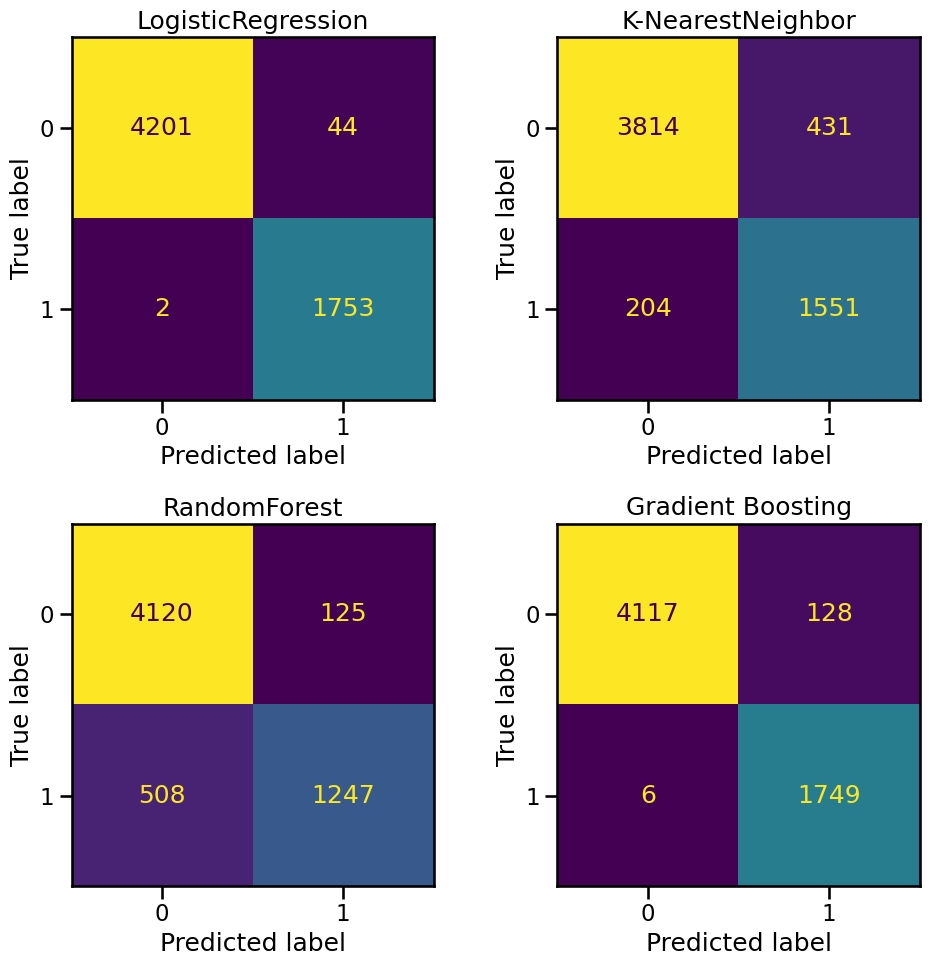

In [53]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_context('talk')

nrows = 2
ncols = 2


fig, ax = plt.subplots(nrows,ncols,figsize=(10,10))

i=0
name_val =['LogisticRegression', 'RandomForest', 'K-NearestNeighbor',  'Gradient Boosting']
for ii in range(0,len(names)): 
    
    row = ii % nrows
    col = ii // ncols
    x = names[ii]
    model = best_estimators[x]
    y_pred = model.predict(X_test)

    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(ax = ax[row][col], colorbar = False)
    ax[row][col].set_title(name_val[i])
    i+=1
plt.tight_layout()
plt.show()

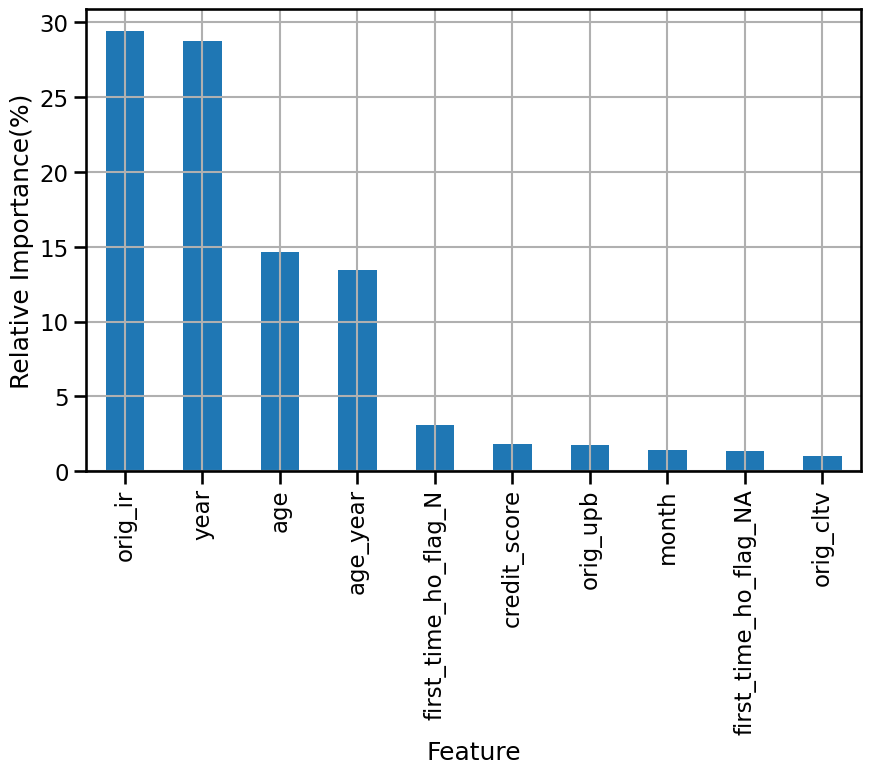

In [54]:
feature_imp = pd.Series(best_estimators['GBC'].feature_importances_*100, index=X_train.columns).sort_values(ascending=False)

ax = feature_imp[:10].plot(kind='bar', figsize=(10, 6))
ax.set(ylabel='Relative Importance(%)');
ax.set(xlabel='Feature')
plt.grid()
plt.show()

The Key metrics based on my observations are:<br>
1. **Customer who have their mortagage for more than 5 years.**<br>
2. **Customer who have intial loan rate comparable to the market.**

### Most importantly a simplistic model such as logistic regression does a better job compared to other complex models.